## Описание данных
Вам представлены данные о доходах сотрудников участка горячего проката за год, в том числе данные, описывающие специфику рабочих мест.
Доход состоит из оклада, премии, доплат и индивидуальных надбавок. Данных об их размерах не приводится, так как именно их Вам предстоит восстановить.


## Задание

1.Выявите формулу дохода в целом и его составных частей.

2.Проверьте, что данная формула объясняет доход с точностью до рубля.

3.Выявите зависимости между составными частями дохода.


## О проделанной работе
Проанализировав некоторые зависимости, я делаю следующие выводы: 
Доход в первую очередь зависит от объема производства, есть норма объема у всех профессий она равна срезу 820 и ниже, здесь разным профессиям платят по разному, но это необходимая норма. Далее идет прирост на каждые 25 (v) идет повышение на +1%, я вычислил это на примере профессии "Уборщик".


Далее можно выделить еще две переменные, которые влияют на доход специалиста, я также это разобрал ниже. Переменная "баллы Вредности" меняется на 1,5% если она равномерно распределена, здесь нельзя было это точно предсказать, потому что есть два варианта с одной профессией 18 и 0. 


Далее я проследил зависимость от Разряда: здесь сохраняется около +8.6% прирост по каждому уровню в среднем, но существуют и всплески как 17% у определенной профессии, см. ниже.


Дополнительные вывоы: Вальцовщиков и Нагревателей металла на предприятии больше, чем остальных профессий. 

Самые оплачиваемые профессии - Вальцовщик и Нагреватель металла высоких уровней
Рекорд по большой зарплате: Шаповалов заработал в Июле больше всех - 36076.764706 (р)
Рекорд по маленькой зарплате: Клюев его зарплата обычно -12180.0 (р)


## СОДЕРЖАНИЕ с ссылками для удобства

[1.Преобразование](#1-bullet)

[2.Количество фамилий в каждой профессии](#2-bullet)

[3.Поиск зависимости от объема работ](#3-bullet)

[4.Поиск зависимости от Вредность (балл.)](#4-bullet)

[5.Поиск зависимости от Разряда](#5-bullet)



In [27]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [5]:
hot_sale = pd.read_excel('hot_sale.xlsx')

In [6]:
hot_sale.head()

,FIO,Месяц,Профессия,Разряд,Оборудование,Вредность (балл.),Объем производства,Доход
0,Абрамов Е. Д.,2009-01-01,Уборщик,3,Пилигримовые станы,18,580,16638.000000
1,Абрамов Е. Д.,2009-02-01,Уборщик,3,Пилигримовые станы,18,790,16638.000000
2,Абрамов Е. Д.,2009-03-01,Уборщик,3,Пилигримовые станы,18,820,16638.000000
3,Абрамов Е. Д.,2009-04-01,Уборщик,3,Пилигримовые станы,18,1200,19396.411765
4,Абрамов Е. Д.,2009-05-01,Уборщик,3,Пилигримовые станы,18,1250,19790.470588


Мы можем здесь увидеть, что столбцы у нас написаны на русском, я бы хотел бы их изменить на англ. чтобы легче было обрабатывать данные, а также выявить уникальность. С первого взгляда можно прикинуть, что формула дохода скорее всего будет зависеть от Объема производства, баллов вредности и разряда, давайте проведем необходимые операции.

In [8]:
hot_sale.shape

(2400, 8)

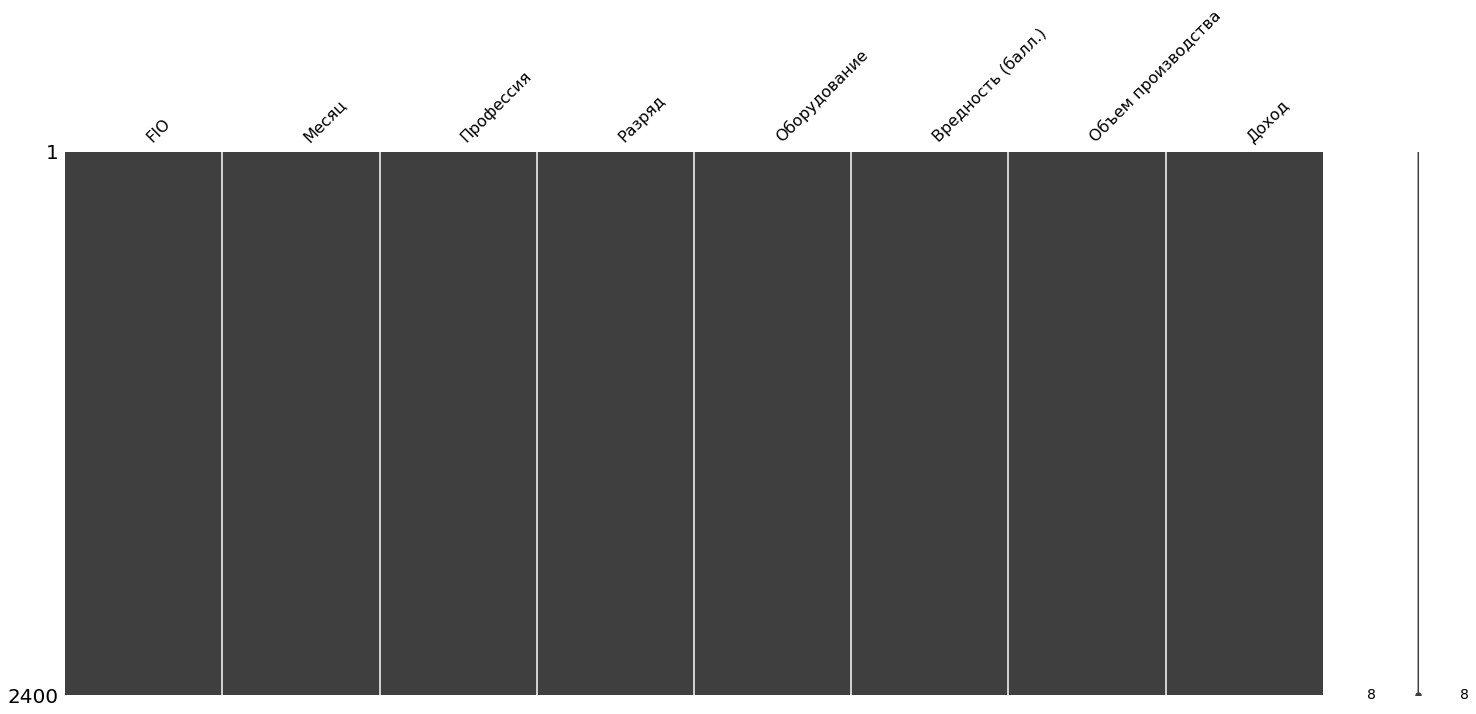

In [28]:
msno.matrix(hot_sale);

## 1.Преобразование <a class="anchor" id="1-bullet"></a>

Данные полные

In [10]:
hot_sale_eng = hot_sale.rename(columns={
   "FIO": "fio",
    "Месяц": "month",
    "Профессия": "profession",
    "Разряд": "level",
    "Оборудование": "equipment",
    "Вредность (балл.)": "danger",
    "Объем производства": "volume",
    "Доход": "income"
})

In [174]:
hot_sale_eng.head(5)

,fio,month,profession,level,equipment,danger,volume,income
0,Абрамов Е. Д.,2009-01-01,Уборщик,3,Пилигримовые станы,18,580,16638.000000
1,Абрамов Е. Д.,2009-02-01,Уборщик,3,Пилигримовые станы,18,790,16638.000000
2,Абрамов Е. Д.,2009-03-01,Уборщик,3,Пилигримовые станы,18,820,16638.000000
3,Абрамов Е. Д.,2009-04-01,Уборщик,3,Пилигримовые станы,18,1200,19396.411765
4,Абрамов Е. Д.,2009-05-01,Уборщик,3,Пилигримовые станы,18,1250,19790.470588


In [18]:
hot_sale_eng['equipment'].unique()

array(['Пилигримовые станы', 'Нагревательные печи',
       'Нагревательные печи, кантовка', 'Калибровочный стан',
       'Контрольно-измерительная аппаратура', 'Калибровочный стан, ГРП',
       'Прошивной стан', 'Нагревательные печи, нагрев',
       'Вспомогательные помещения'], dtype=object)

In [19]:
hot_sale_eng['level'].unique()

array([3, 6, 7, 5, 4], dtype=int64)

In [20]:
hot_sale_eng['danger'].unique()

array([18, 22,  8,  0, 16, 11], dtype=int64)

In [22]:
hot_sale_eng['volume'].unique()

array([ 580,  790,  820, 1200, 1250,  950, 1400, 1180, 1080,  780, 1020,
        810], dtype=int64)

In [23]:
hot_sale_eng['profession'].unique()

array(['Уборщик', 'Вальцовщик', 'Нагревальщик металла',
       'Оператор поста управления',
       'Контролер качества готовой продукции', 'Подручный вальцовщика',
       'Резчик горячего металла', 'Посадчик металла', 'Огнеупорщик'],
      dtype=object)

In [24]:
hot_sale_eng['equipment'].unique()

array(['Пилигримовые станы', 'Нагревательные печи',
       'Нагревательные печи, кантовка', 'Калибровочный стан',
       'Контрольно-измерительная аппаратура', 'Калибровочный стан, ГРП',
       'Прошивной стан', 'Нагревательные печи, нагрев',
       'Вспомогательные помещения'], dtype=object)

Мы видим, что здесь максимум 4 по уровню сложности и 6 по опасности.
Датасет насчитывает 9 различных оборудований
Объемов немного больше, около 12 различных
Также мы имеем 9 различных профессий

In [29]:
hot_sale_eng.describe()

,level,danger,volume,income
count,2400.000000,2400.000000,2400.000000,2400.000000
mean,4.900000,15.785000,988.333333,21665.570570
std,1.371417,6.567857,230.982220,4686.885527
min,3.000000,0.000000,580.000000,12180.000000
25%,4.000000,14.750000,805.000000,18076.500000
50%,5.000000,18.000000,985.000000,21057.300000
75%,6.000000,19.000000,1185.000000,25105.764706
max,7.000000,22.000000,1400.000000,36076.764706


# Количество фамилий в каждой профессии <a class="anchor" id="2-bullet"></a>

In [220]:
hot_sale_eng.groupby('profession').agg({'fio': 'count'})/12

,fio
profession,
Вальцовщик,51.0
Контролер качества готовой продукции,9.0
Нагревальщик металла,42.0
Огнеупорщик,5.0
Оператор поста управления,27.0
Подручный вальцовщика,30.0
Посадчик металла,8.0
Резчик горячего металла,7.0
Уборщик,21.0


In [179]:
prof = hot_sale_eng.groupby('profession').agg({'fio': 'count'})/12

In [200]:
import matplotlib.patches

C:\Users\maxim\AppData\Local\Temp/ipykernel_26704/2819881547.py:2: UserWarning: Legend does not support 'fio' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend(prof, labels, loc="best")


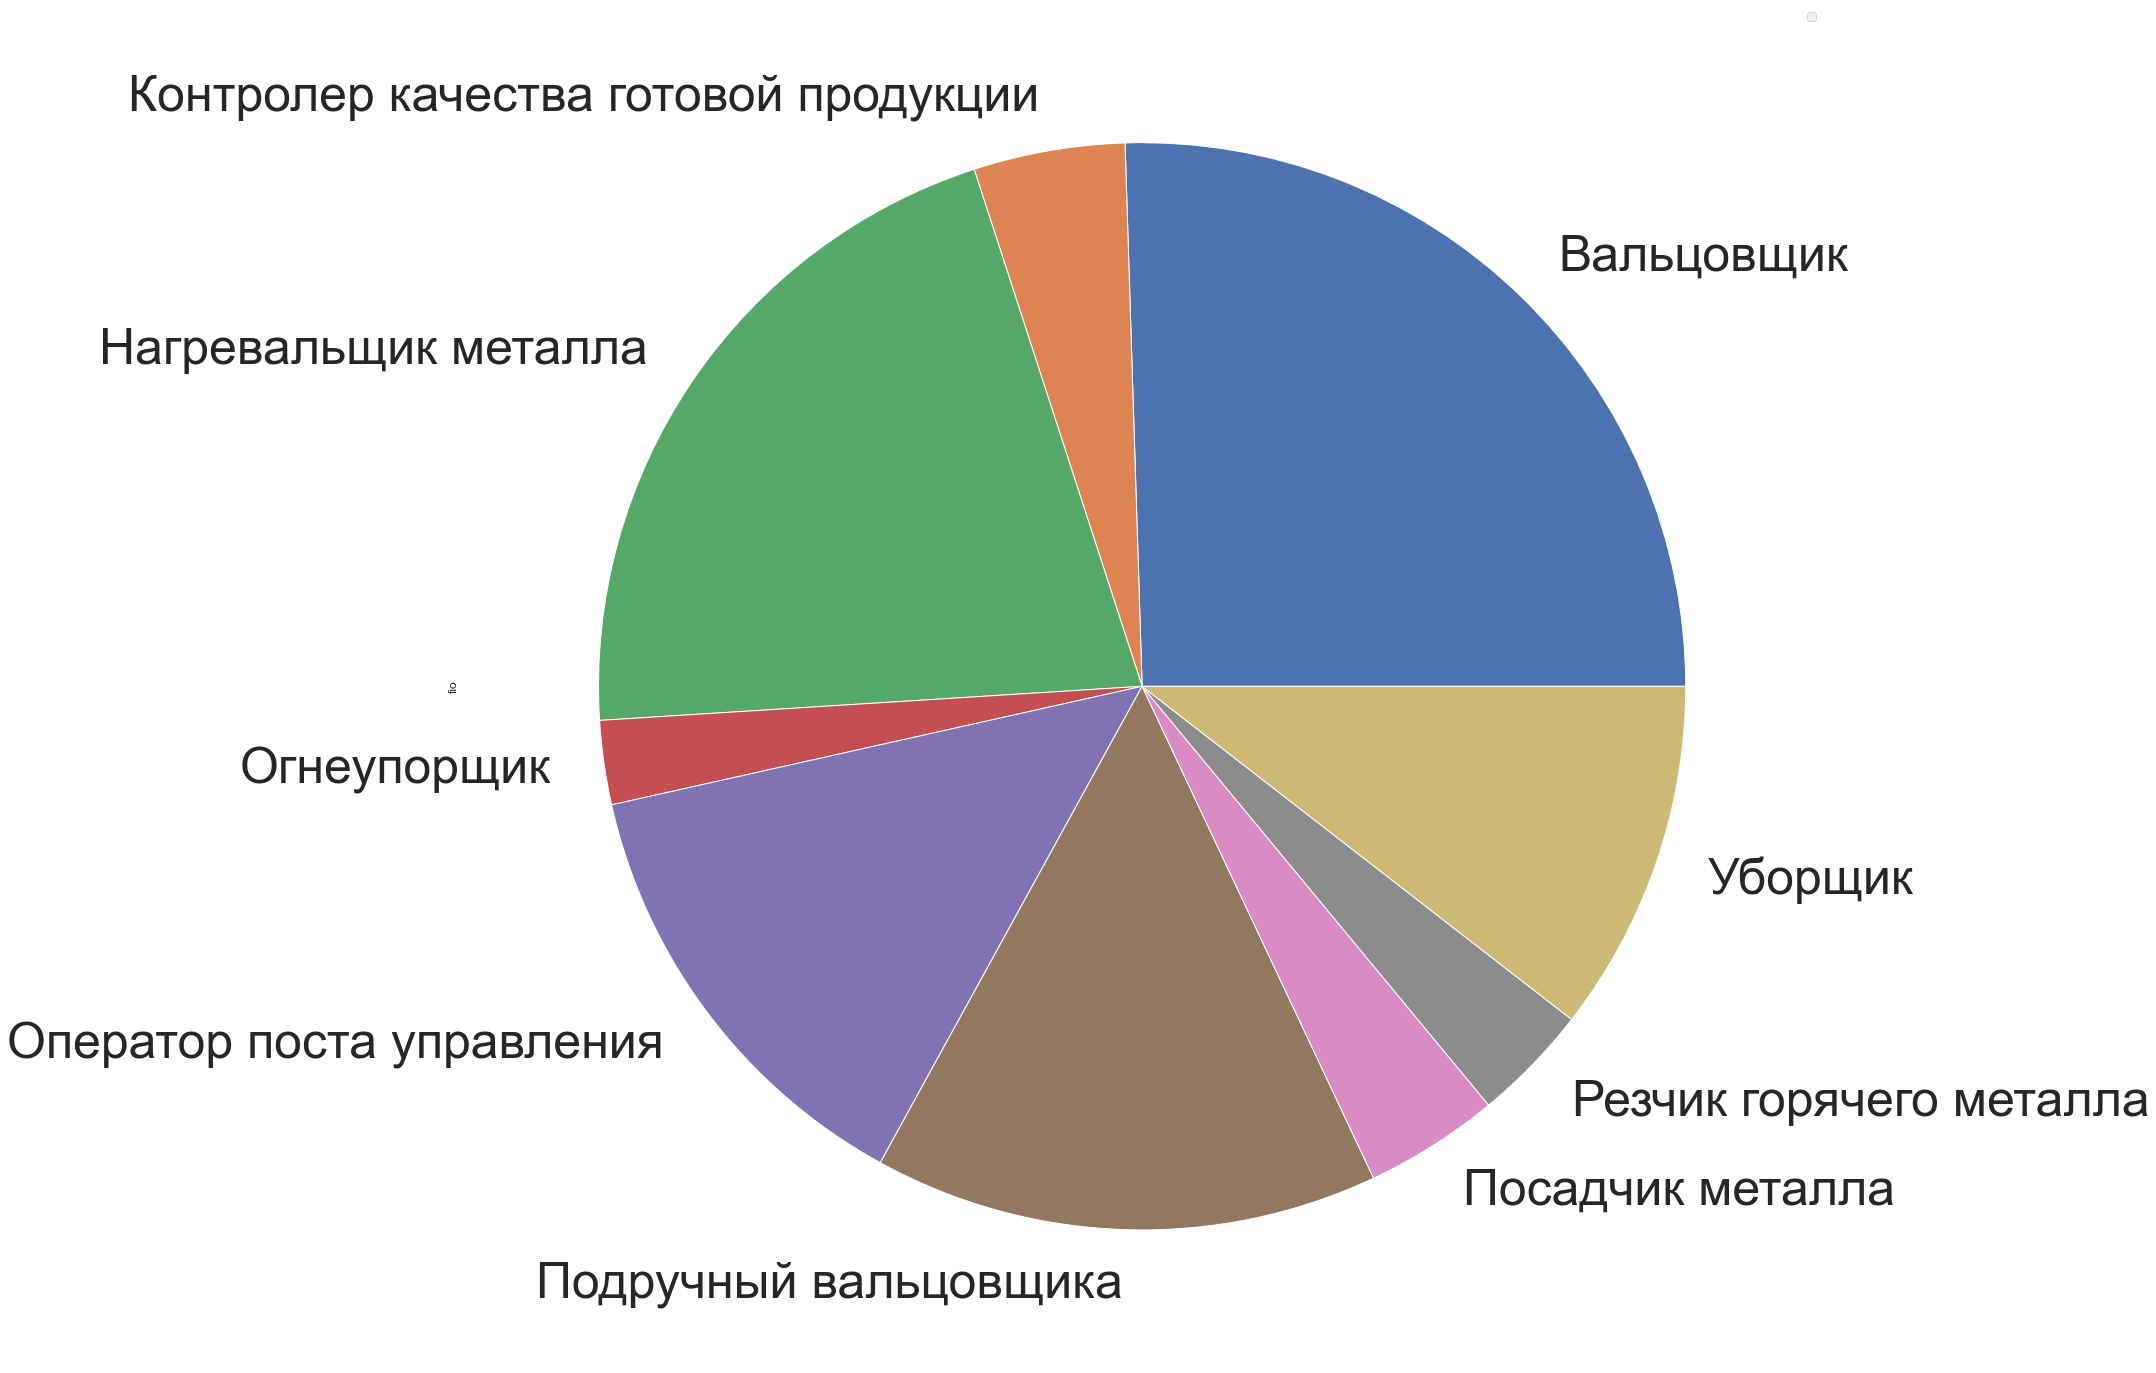

In [219]:
prof.plot.pie(y='fio', figsize=(30, 25))
plt.legend(prof, labels, loc="best")

## А также относительно баллов вредности и разряда

In [127]:
hot_sale_eng.groupby(['profession','danger','level'])\
    .agg({'fio': 'count'})/12
#18, 22,  8,  0, 16, 11

fio
profession                           danger level      
Вальцовщик                           18     5      10.0
                                            6      22.0
                                            7      19.0
Контролер качества готовой продукции 0      7       9.0
Нагревальщик металла                 22     4       7.0
                                            5      17.0
                                            6       8.0
                                            7      10.0
Огнеупорщик                          11     4       5.0
Оператор поста управления            8      4      13.0
                                            5      14.0
Подручный вальцовщика                18     3      14.0
                                            4      16.0
Посадчик металла                     22     4       8.0
Резчик горячего металла              16     4       7.0
Уборщик                              0      3       9.0
                                     18     3      12.0

На графике ниже можно увидеть, что даже классным уборщикам платят мало, а самые высокооплачиваемые это Нагревальщики метала, Вальцовщики

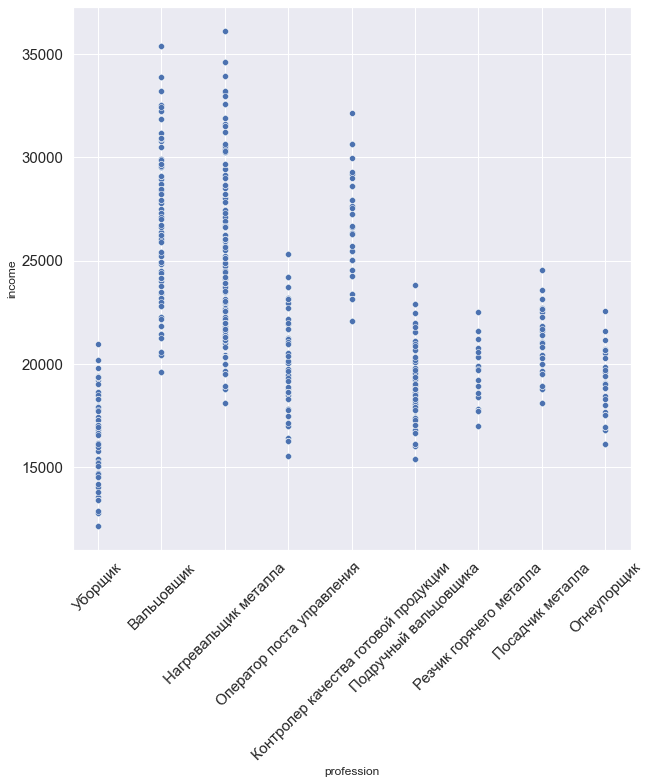

In [239]:
b = sns.scatterplot(x="profession", y="income", data=hot_sale_eng)
plt.xticks(rotation=45)
b.tick_params(labelsize=15)

In [246]:
hot_sale_eng.groupby('fio').agg({'income':'max'}).sort_values('income',ascending=False)

,income
fio,
Шаповалов А. Р.,36076.764706
Чернов И. А.,36076.764706
Сергеев Р. Е.,35356.764706
Гришин А. А.,35356.764706
Окулов Л. Н.,35356.764706
...,...
Львов А. С.,16120.588235
Чернышев Д. В.,16120.588235
Журавлев Б. И.,16120.588235


In [249]:
hot_sale_eng.groupby('fio').agg({'income':'min'}).sort_values('income',ascending=True)

,income
fio,
Клюев Д. М.,12180.0
Журавлев Б. И.,12180.0
Львов А. С.,12180.0
Чернышев Д. В.,12180.0
Наумов О. В.,12180.0
...,...
Гришин А. А.,27506.0
Окулов Л. Н.,27506.0
Сергеев Р. Е.,27506.0


In [250]:
hot_sale_eng.query('fio == "Клюев Д. М."')

,fio,month,profession,level,equipment,danger,volume,income
792,Клюев Д. М.,2009-01-01,Уборщик,3,Вспомогательные помещения,0,580,12180.000000
793,Клюев Д. М.,2009-02-01,Уборщик,3,Вспомогательные помещения,0,790,12180.000000
794,Клюев Д. М.,2009-03-01,Уборщик,3,Вспомогательные помещения,0,820,12180.000000
795,Клюев Д. М.,2009-04-01,Уборщик,3,Вспомогательные помещения,0,1200,14687.647059
796,Клюев Д. М.,2009-05-01,Уборщик,3,Вспомогательные помещения,0,1250,15045.882353
797,Клюев Д. М.,2009-06-01,Уборщик,3,Вспомогательные помещения,0,950,12896.470588
798,Клюев Д. М.,2009-07-01,Уборщик,3,Вспомогательные помещения,0,1400,16120.588235
799,Клюев Д. М.,2009-08-01,Уборщик,3,Вспомогательные помещения,0,1180,14544.352941
800,Клюев Д. М.,2009-09-01,Уборщик,3,Вспомогательные помещения,0,1080,13827.882353
801,Клюев Д. М.,2009-10-01,Уборщик,3,Вспомогательные помещения,0,780,12180.000000


# Поиск зависимости от объема работ <a class="anchor" id="3-bullet"></a>

In [74]:
hot_sale_eng.query('fio == "Абрамов Е. Д."')

,fio,month,profession,level,equipment,danger,volume,income
0,Абрамов Е. Д.,2009-01-01,Уборщик,3,Пилигримовые станы,18,580,16638.000000
1,Абрамов Е. Д.,2009-02-01,Уборщик,3,Пилигримовые станы,18,790,16638.000000
2,Абрамов Е. Д.,2009-03-01,Уборщик,3,Пилигримовые станы,18,820,16638.000000
3,Абрамов Е. Д.,2009-04-01,Уборщик,3,Пилигримовые станы,18,1200,19396.411765
4,Абрамов Е. Д.,2009-05-01,Уборщик,3,Пилигримовые станы,18,1250,19790.470588
5,Абрамов Е. Д.,2009-06-01,Уборщик,3,Пилигримовые станы,18,950,17426.117647
6,Абрамов Е. Д.,2009-07-01,Уборщик,3,Пилигримовые станы,18,1400,20972.647059
7,Абрамов Е. Д.,2009-08-01,Уборщик,3,Пилигримовые станы,18,1180,19238.788235
8,Абрамов Е. Д.,2009-09-01,Уборщик,3,Пилигримовые станы,18,1080,18450.670588
9,Абрамов Е. Д.,2009-10-01,Уборщик,3,Пилигримовые станы,18,780,16638.000000


Возьмем одну профессию, здесь мы видим, что danger находится в одном значении - 18, тогда как volume постоянно меняется, давайте проследим закономерность при интервале 
580 - 820 видим цифру 16638 мне кажется, что это их стандартный нормированый оклад

разница между 1250 и 1200 составляет примерно 2% (50 v), т.е 1% = (25 v)

Давайте проверим нашу гипотезу на более длинном интервале
1020 - 820 = 200 (v), то есть на 8%
Простыми вычислениями доказываем, что это правда

# Поиск зависимости от Вредность (балл.) <a class="anchor" id="4-bullet"></a>	

In [98]:
hot_sale_eng.query('fio == "Григорьев А. Т."')

,fio,month,profession,level,equipment,danger,volume,income
468,Григорьев А. Т.,2009-01-01,Уборщик,3,Вспомогательные помещения,0,580,12180.000000
469,Григорьев А. Т.,2009-02-01,Уборщик,3,Вспомогательные помещения,0,790,12180.000000
470,Григорьев А. Т.,2009-03-01,Уборщик,3,Вспомогательные помещения,0,820,12180.000000
471,Григорьев А. Т.,2009-04-01,Уборщик,3,Вспомогательные помещения,0,1200,14687.647059
472,Григорьев А. Т.,2009-05-01,Уборщик,3,Вспомогательные помещения,0,1250,15045.882353
473,Григорьев А. Т.,2009-06-01,Уборщик,3,Вспомогательные помещения,0,950,12896.470588
474,Григорьев А. Т.,2009-07-01,Уборщик,3,Вспомогательные помещения,0,1400,16120.588235
475,Григорьев А. Т.,2009-08-01,Уборщик,3,Вспомогательные помещения,0,1180,14544.352941
476,Григорьев А. Т.,2009-09-01,Уборщик,3,Вспомогательные помещения,0,1080,13827.882353
477,Григорьев А. Т.,2009-10-01,Уборщик,3,Вспомогательные помещения,0,780,12180.000000


Здесь можно увидеть, что при danger 0 income = 12180, то есть на 27% понижена начальная ставка income, то есть на 1.5% за каждый балл опасности, давайте узнаем зарплату помощника вальцовщика, при тех же значениях, просто сравним.

In [221]:
hot_sale_eng.query('profession == "Подручный вальцовщика" & level == 3')

,fio,month,profession,level,equipment,danger,volume,income
216,Быков Л. Н.,2009-01-01,Подручный вальцовщика,3,Пилигримовые станы,18,580,15420.000000
217,Быков Л. Н.,2009-02-01,Подручный вальцовщика,3,Пилигримовые станы,18,790,15420.000000
218,Быков Л. Н.,2009-03-01,Подручный вальцовщика,3,Пилигримовые станы,18,820,15420.000000
219,Быков Л. Н.,2009-04-01,Подручный вальцовщика,3,Пилигримовые станы,18,1200,17927.647059
220,Быков Л. Н.,2009-05-01,Подручный вальцовщика,3,Пилигримовые станы,18,1250,18285.882353
...,...,...,...,...,...,...,...,...
2347,Шестаков Е. А.,2009-08-01,Подручный вальцовщика,3,Пилигримовые станы,18,1180,17784.352941
2348,Шестаков Е. А.,2009-09-01,Подручный вальцовщика,3,Пилигримовые станы,18,1080,17067.882353
2349,Шестаков Е. А.,2009-10-01,Подручный вальцовщика,3,Пилигримовые станы,18,780,15420.000000
2350,Шестаков Е. А.,2009-11-01,Подручный вальцовщика,3,Пилигримовые станы,18,1020,16638.000000


Странно, но у Уборщика зарпалата выше при тех же характеристиках, чем у помощника Вальцовщика на 1218 р. Наверное просто джунам платят меньше )))

# Поиск зависимости от Разряда <a class="anchor" id="5-bullet"></a>	

### Нагревальщик металла
4 уровень = 18796,5

5 уровень = 20350 (+8.26%)

6 уровень = 23931 (+17.6% )

7 уровень = 26020 (+8.7%)
* Видим выброс, когда переходим с 5 уровня на 6, проверим у других профессий на этом интервале прослеживается тоже самое?




### Вальцовщик

5 уровень = 20449.5

6 уровень = 22260 (+8.85%)

7 уровень = 25300 (+13.6%)

* Видим, что для каждой профессии, скорее всего прописаны свои проценты для каждого уровня.